In [3]:
import pandas as pd
from pandasql import sqldf

df_clientes = pd.read_csv(r"C:\Users\danie\Documents\case_promobit\teste_promobit\data\raw\clientes.csv")
df_itenspedido = pd.read_csv(r"C:\Users\danie\Documents\case_promobit\teste_promobit\data\raw\itens_pedido.csv")
df_pedidos = pd.read_csv(r"C:\Users\danie\Documents\case_promobit\teste_promobit\data\raw\pedidos.csv")
df_produtos = pd.read_csv(r"C:\Users\danie\Documents\case_promobit\teste_promobit\data\raw\produtos.csv")

#visualizando os cabeçalhos:

print("Tabela clientes: ",df_clientes.dtypes, type(df_clientes))
print("Tabela itenspedido: ",df_itenspedido.dtypes, type(df_itenspedido))
print("Tabela pedidos: ",df_pedidos.dtypes, type(df_itenspedido))
print("Tabela produtos: ",df_produtos.dtypes, type(df_itenspedido))

Tabela clientes:  cliente_id        int64
nome             object
email            object
data_cadastro    object
cidade           object
estado           object
grupo            object
dtype: object <class 'pandas.core.frame.DataFrame'>
Tabela itenspedido:  item_id             int64
pedido_id           int64
produto_id          int64
quantidade          int64
preco_unitario    float64
subtotal          float64
dtype: object <class 'pandas.core.frame.DataFrame'>
Tabela pedidos:  pedido_id       int64
cliente_id      int64
data_pedido    object
status         object
valor_total     int64
dtype: object <class 'pandas.core.frame.DataFrame'>
Tabela produtos:  produto_id      int64
preco         float64
categoria      object
dtype: object <class 'pandas.core.frame.DataFrame'>


## Análise exploratória das tabelas clientes em SQL:

In [4]:
#duplicados?

query_clientes_1 = sqldf("SELECT cliente_id, COUNT(*) as qtd FROM df_clientes GROUP BY cliente_id HAVING COUNT(*)> 1", globals())
print(query_clientes_1)

query_clientes_2 = sqldf("SELECT estado, COUNT(*) as qtd FROM df_clientes GROUP BY estado HAVING COUNT(*)> 1", globals())
print(query_clientes_2)

query_clientes_3 = sqldf("SELECT cidade, COUNT(*) as qtd FROM df_clientes GROUP BY cidade HAVING COUNT(*)> 1", globals())
print(query_clientes_3)

# sem clientes duplicados
# estados não está corretamente relacionados às cidades(?)

Empty DataFrame
Columns: [cliente_id, qtd]
Index: []
   estado  qtd
0      AC   37
1      AL   48
2      AM   48
3      AP   50
4      BA   42
5      CE   38
6      DF   47
7      ES   53
8      GO   50
9      MA   50
10     MG   51
11     MS   43
12     MT   44
13     PA   47
14     PB   39
15     PE   41
16     PI   41
17     PR   43
18     RJ   44
19     RN   36
20     RO   36
21     RR   55
22     RS   36
23     SC   47
24     SE   45
25     SP   42
26     TO   47
            cidade  qtd
0   Belo Horizonte   92
1         Curitiba   87
2          Goiania   83
3          Goiânia   77
4         Maranhao   92
5         Maranhão   78
6              Rio   87
7   Rio de Janeiro   84
8        Sao Paulo  165
9        São Paulo   89
10       sao Paulo  266


## Análise exploratória das tabelas pedidos em SQL:

In [5]:
#duplicados?

query_pedidos_1 = sqldf("SELECT pedido_id, COUNT(*) as qtd FROM df_pedidos GROUP BY pedido_id HAVING COUNT(*) ORDER BY qtd DESC", globals())
print(query_pedidos_1)

query_pedidos_2 = sqldf("SELECT cliente_id, COUNT(*) as qtd FROM df_pedidos GROUP BY cliente_id HAVING COUNT(*) ORDER BY qtd DESC", globals())
print(query_pedidos_2)

query_pedidos_3 = sqldf("SELECT status, COUNT(*) as qtd FROM df_pedidos GROUP BY status HAVING COUNT(*) ORDER BY qtd DESC", globals())
print(query_pedidos_3)


# sem pedidos duplicados

      pedido_id  qtd
0        999787    1
1        999752    1
2        999483    1
3        999463    1
4        999431    1
...         ...  ...
9995     100480    1
9996     100384    1
9997     100295    1
9998     100274    1
9999     100013    1

[10000 rows x 2 columns]
      cliente_id  qtd
0          88982   17
1          78086   17
2          66383   17
3          65255   17
4          22464   17
...          ...  ...
1195       54164    2
1196       41861    2
1197       23433    2
1198       39354    1
1199       18551    1

[1200 rows x 2 columns]
       status   qtd
0  Confirmado  6648
1   CANCELADO  1683
2     Pending  1669


## Análise exploratória da tabela produtos em SQL:

In [6]:
#duplicados?

query_produtos_1 = sqldf("SELECT produto_id, COUNT(*) as qtd FROM df_produtos GROUP BY produto_id HAVING COUNT(*) ORDER BY qtd DESC", globals())
print(query_produtos_1)


# sem produtos duplicados

     produto_id  qtd
0          9986    1
1          9985    1
2          9944    1
3          9942    1
4          9928    1
..          ...  ...
495        1044    1
496        1032    1
497        1016    1
498        1008    1
499        1006    1

[500 rows x 2 columns]


## Tratamento de dados

In [7]:
#ajustando os dtypes das tabelas:

#considerando que estamos utilizando o panda, quando a string está como object, não é necessário conversão para string já que o pandas e o pandasql utiliza "object" para string
df_clientes['data_cadastro'] = pd.to_datetime(df_clientes['data_cadastro'])
df_pedidos['data_pedido'] = pd.to_datetime(df_pedidos['data_pedido'])



print(df_clientes.dtypes)



cliente_id                int64
nome                     object
email                    object
data_cadastro    datetime64[ns]
cidade                   object
estado                   object
grupo                    object
dtype: object


In [8]:
#ajustando o nome das cidades

correcoes_cidades = {
    'Maranhao': 'Maranhão',
    'Rio': 'Rio de Janeiro',
    'Sao Paulo': 'São Paulo',
    'sao Paulo': 'São Paulo',
    'Goiania': 'Goiânia'
}

df_clientes['cidade'] = df_clientes['cidade'].replace(correcoes_cidades)

contagem_cidades = df_clientes['cidade'].value_counts()

print(contagem_cidades)

cidade
São Paulo         520
Rio de Janeiro    171
Maranhão          170
Goiânia           160
Belo Horizonte     92
Curitiba           87
Name: count, dtype: int64


## 1. Qual grupo você escolheria para ser a nossa funcionalidade? Por que?

## Resposta:

Considerei 3 métricas importantes onde o **Grupo C**, mesmo que com baixa relevância, se mostrou superior ao B e ao grupo de controle.
Resultados para o Grupo C:
**Aumento real da taxa de pedidos: 4.91%**
**Aumento real do ticket médio: 13.83%**
**Taxa de confirmação: 64.94%**




### Calculando resultados por grupo

In [9]:

query_resposta_1 = """
SELECT
    c.grupo,
    COUNT(DISTINCT c.cliente_id) AS cont_clientes,
    COUNT(DISTINCT p.pedido_id) AS cont_pedidos,
    SUM(p.valor_total) AS valor_pedidos,
    SUM(p.valor_total)/(COUNT(DISTINCT c.cliente_id)) AS ticket_medio,
    ROUND(1.0 * COUNT(DISTINCT p.pedido_id)/COUNT(DISTINCT p.cliente_id),2) as taxa_pedidos
FROM
df_clientes c
INNER JOIN df_pedidos p ON c.cliente_id = p.cliente_id
WHERE
p.status = "Confirmado"
GROUP BY c.grupo
"""
resposta_1 = sqldf(query_resposta_1, globals())
print(resposta_1)

  grupo  cont_clientes  cont_pedidos  valor_pedidos  ticket_medio  \
0     A            412          2263        6671606         16193   
1     B            398          2151        7270871         18268   
2     C            388          2234        7152182         18433   

   taxa_pedidos  
0          5.49  
1          5.40  
2          5.76  


### Calculando aumento real dos grupos Variantes por Controle - Taxa de Pedidos

In [10]:
taxa_A = resposta_1.loc[resposta_1['grupo'] == 'A', 'taxa_pedidos'].values[0]

resposta_1['aumento_real_taxa_pedidos'] = (resposta_1['taxa_pedidos'] - taxa_A) / taxa_A

resposta_1['aumento_real_taxa_pedidos%'] = resposta_1['aumento_real_taxa_pedidos'] * 100

print(resposta_1[['grupo', 'taxa_pedidos', 'aumento_real_taxa_pedidos%']])

  grupo  taxa_pedidos  aumento_real_taxa_pedidos%
0     A          5.49                    0.000000
1     B          5.40                   -1.639344
2     C          5.76                    4.918033


### Calculando aumento real dos grupos Variantes por Controle - Ticket Médio

In [11]:
tm_a = resposta_1.loc[resposta_1['grupo'] == 'A', 'ticket_medio'].values[0]

resposta_1['aumento_real_tm'] = (resposta_1['ticket_medio'] - tm_a) / tm_a

resposta_1['aumento_real_tm%'] = resposta_1['aumento_real_tm'] * 100

print(resposta_1[['grupo', 'ticket_medio', 'aumento_real_tm%']])

  grupo  ticket_medio  aumento_real_tm%
0     A         16193          0.000000
1     B         18268         12.814179
2     C         18433         13.833138


### Calculando taxa de confirmação por grupo

In [12]:
query_resposta_1_1 = """
SELECT
    c.grupo,
    COUNT(DISTINCT c.cliente_id) AS cont_clientes,
    COUNT(DISTINCT p.pedido_id) AS cont_pedidos,
    COUNT(CASE WHEN p.status = 'Confirmado' THEN p.pedido_id END) AS confirmados,
    COUNT(CASE WHEN p.status = 'Pending' THEN p.pedido_id END) AS pendentes,
    COUNT(CASE WHEN p.status = 'CANCELADO' THEN p.pedido_id END) AS cancelados
FROM
df_clientes c
INNER JOIN df_pedidos p ON c.cliente_id = p.cliente_id
GROUP BY c.grupo
"""
resposta_1_1 = sqldf(query_resposta_1_1, globals())
print(resposta_1_1)

  grupo  cont_clientes  cont_pedidos  confirmados  pendentes  cancelados
0     A            413          3440         2263        576         601
1     B            398          3267         2151        559         557
2     C            389          3293         2234        534         525


In [13]:
tm_a = resposta_1_1.loc[resposta_1['grupo'] == 'A', 'cont_pedidos'].values[0]

resposta_1_1['taxa_confirmacao%'] = (resposta_1_1['confirmados']/tm_a)*100

print(resposta_1_1)

  grupo  cont_clientes  cont_pedidos  confirmados  pendentes  cancelados  \
0     A            413          3440         2263        576         601   
1     B            398          3267         2151        559         557   
2     C            389          3293         2234        534         525   

   taxa_confirmacao%  
0          65.784884  
1          62.529070  
2          64.941860  


## 2. De acordo com suas análises, o estado do usuário influencia no valor das vendas?

In [14]:
query_resposta_2 = """
SELECT
    c.estado,
    COUNT(DISTINCT c.cliente_id) AS cont_clientes,
    COUNT(DISTINCT p.pedido_id) AS cont_pedidos,
    SUM(p.valor_total) AS valor_pedidos,
    SUM(p.valor_total)/(COUNT(DISTINCT c.cliente_id)) AS ticket_medio,
    ROUND(1.0 * COUNT(DISTINCT p.pedido_id)/COUNT(DISTINCT p.cliente_id),2) as taxa_pedidos
FROM
df_clientes c
INNER JOIN df_pedidos p ON c.cliente_id = p.cliente_id
WHERE
p.status = "Confirmado"
GROUP BY c.estado
"""
resposta_2 = sqldf(query_resposta_2, globals())
print(resposta_2)

   estado  cont_clientes  cont_pedidos  valor_pedidos  ticket_medio  \
0      AC             37           218         716164         19355   
1      AL             48           253         828874         17268   
2      AM             48           257         797341         16611   
3      AP             50           282         868457         17369   
4      BA             42           230         711964         16951   
5      CE             38           190         633867         16680   
6      DF             47           236         755397         16072   
7      ES             53           277         863116         16285   
8      GO             50           297         907330         18146   
9      MA             49           286         905260         18474   
10     MG             51           322        1042707         20445   
11     MS             43           246         743910         17300   
12     MT             44           250         805316         18302   
13    

In [15]:
query_resposta_2_1 = """
SELECT
    c.cidade,
    COUNT(DISTINCT c.cliente_id) AS cont_clientes,
    COUNT(DISTINCT p.pedido_id) AS cont_pedidos,
    SUM(p.valor_total) AS valor_pedidos,
    SUM(p.valor_total)/(COUNT(DISTINCT c.cliente_id)) AS ticket_medio,
    ROUND(1.0 * COUNT(DISTINCT p.pedido_id)/COUNT(DISTINCT p.cliente_id),2) as taxa_pedidos
FROM
df_clientes c
INNER JOIN df_pedidos p ON c.cliente_id = p.cliente_id
WHERE
p.status = "Confirmado"
GROUP BY c.cidade
ORDER BY valor_pedidos DESC
"""
resposta_2_1 = sqldf(query_resposta_2_1, globals())
print(resposta_2_1)

           cidade  cont_clientes  cont_pedidos  valor_pedidos  ticket_medio  \
0       São Paulo            520          2870        9193242         17679   
1  Rio de Janeiro            171           944        2941236         17200   
2        Maranhão            168           921        2912830         17338   
3         Goiânia            160           917        2903485         18146   
4        Curitiba             87           525        1635440         18798   
5  Belo Horizonte             92           471        1508426         16395   

   taxa_pedidos  
0          5.52  
1          5.52  
2          5.48  
3          5.73  
4          6.03  
5          5.12  


**Podemos ver inconsistência nos dados, vide que as cidades não condizem com os estados cadastrados. Pensando nisso, darei duas possíveis respostas, entendendo que para análise correta, precisamos revisistar a DB e entender em qual ponto da extração existe o erro dos dados**

## Hipótese 1: utilizando a coluna estados standard

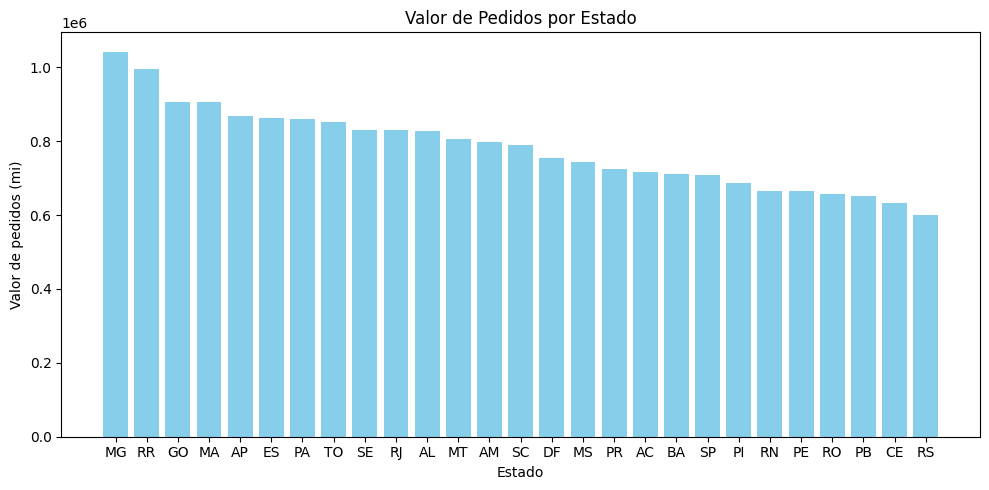

In [16]:
import matplotlib.pyplot as plt

df_ordenado_valor_pedidos_1 = resposta_2.sort_values(by="valor_pedidos", ascending=False)


plt.figure(figsize=(10, 5))
plt.bar(df_ordenado_valor_pedidos_1['estado'], df_ordenado_valor_pedidos_1['valor_pedidos'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Valor de pedidos (mi)')
plt.title('Valor de Pedidos por Estado')
plt.tight_layout()
plt.show()

### Ticket médio por estado

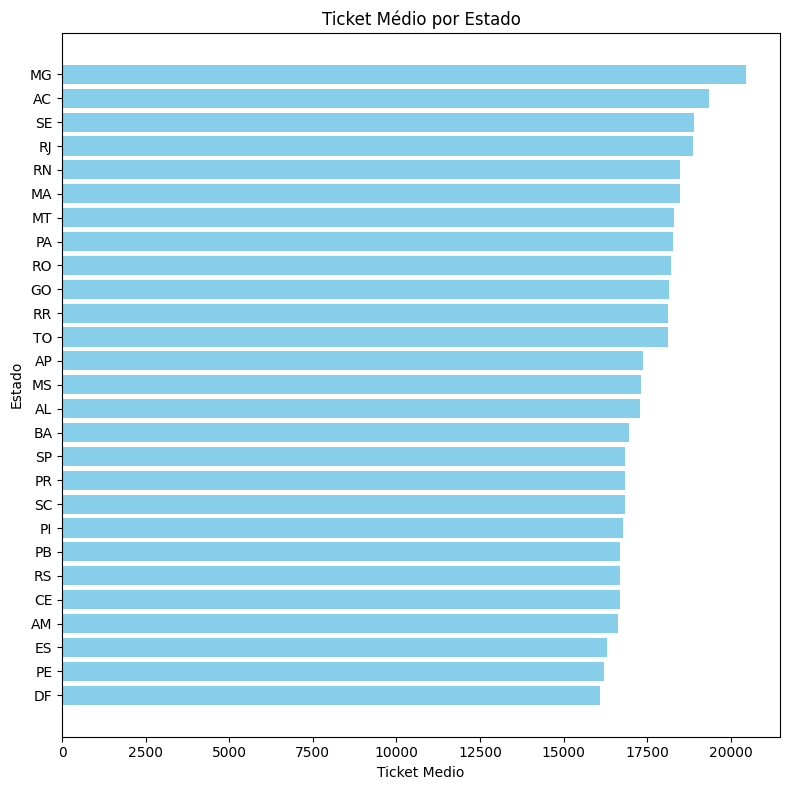

In [17]:
import matplotlib.pyplot as plt

df_ordenado_tm = resposta_2.sort_values(by='ticket_medio', ascending=True)

plt.figure(figsize=(8, 8))
plt.barh(df_ordenado_tm['estado'], df_ordenado_tm['ticket_medio'], color='skyblue')
plt.xlabel('Ticket Medio')
plt.ylabel('Estado')
plt.title('Ticket Médio por Estado')
plt.tight_layout()
plt.show()

### Taxa de Pedidos por estado

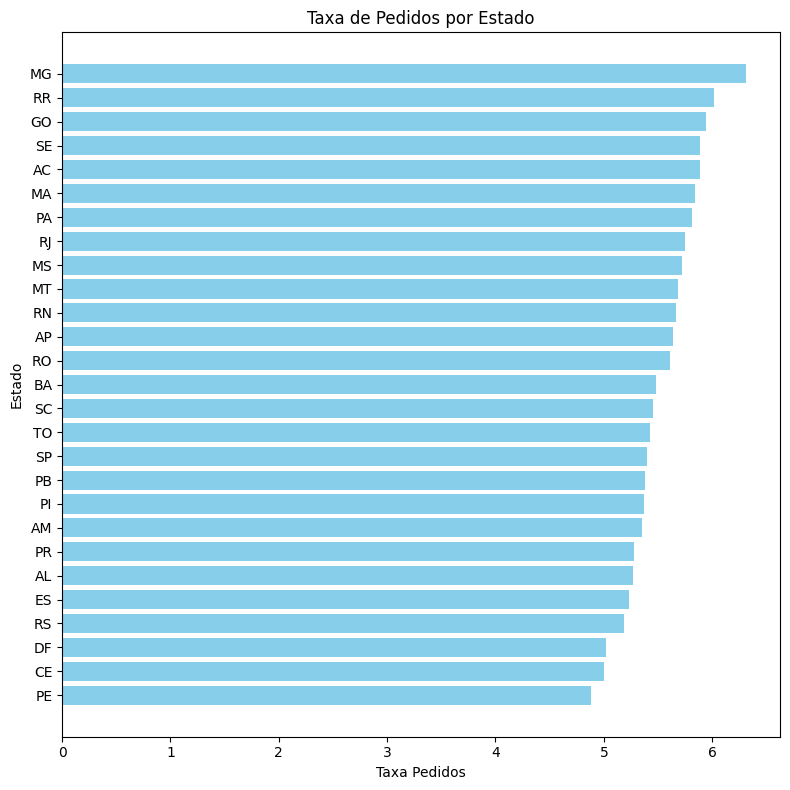

In [21]:
import matplotlib.pyplot as plt

df_ordenado_taxa_pedidos = resposta_2.sort_values(by='taxa_pedidos', ascending=True)

plt.figure(figsize=(8, 8))
plt.barh(df_ordenado_taxa_pedidos['estado'], df_ordenado_taxa_pedidos['taxa_pedidos'], color='skyblue')
plt.xlabel('Taxa Pedidos')
plt.ylabel('Estado')
plt.title('Taxa de Pedidos por Estado')
plt.tight_layout()
plt.show()

## Hipótese 2: criando uma nova coluna de estado, baseando que os dados corretos na DB são das cidades

### Valor pedidos por estado

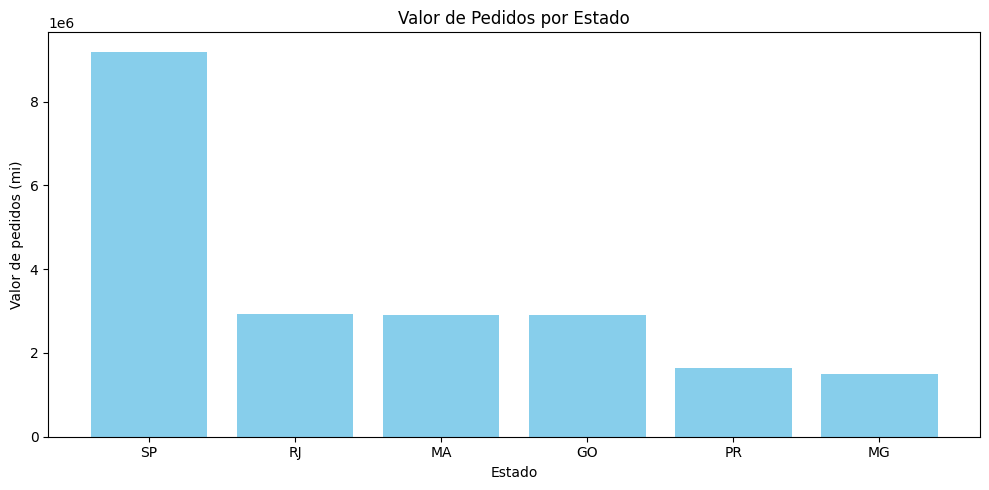

In [22]:
import matplotlib.pyplot as plt

correcoes_cidades_estado = {
    'Maranhão': 'MA',
    'Rio de Janeiro': 'RJ',
    'São Paulo': 'SP',
    'Curitiba': 'PR',
    'Goiânia': 'GO',
    'Belo Horizonte': 'MG'

}

resposta_2_1['estado'] = resposta_2_1['cidade'].map(correcoes_cidades_estado)
df_ordenado_valor_pedidos_cidades = resposta_2_1.sort_values(by='valor_pedidos', ascending=False)


plt.figure(figsize=(10, 5))
plt.bar(df_ordenado_valor_pedidos_cidades['estado'], df_ordenado_valor_pedidos_cidades['valor_pedidos'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Valor de pedidos (mi)')
plt.title('Valor de Pedidos por Estado')
plt.tight_layout()
plt.show()

### Ticket médio por estado

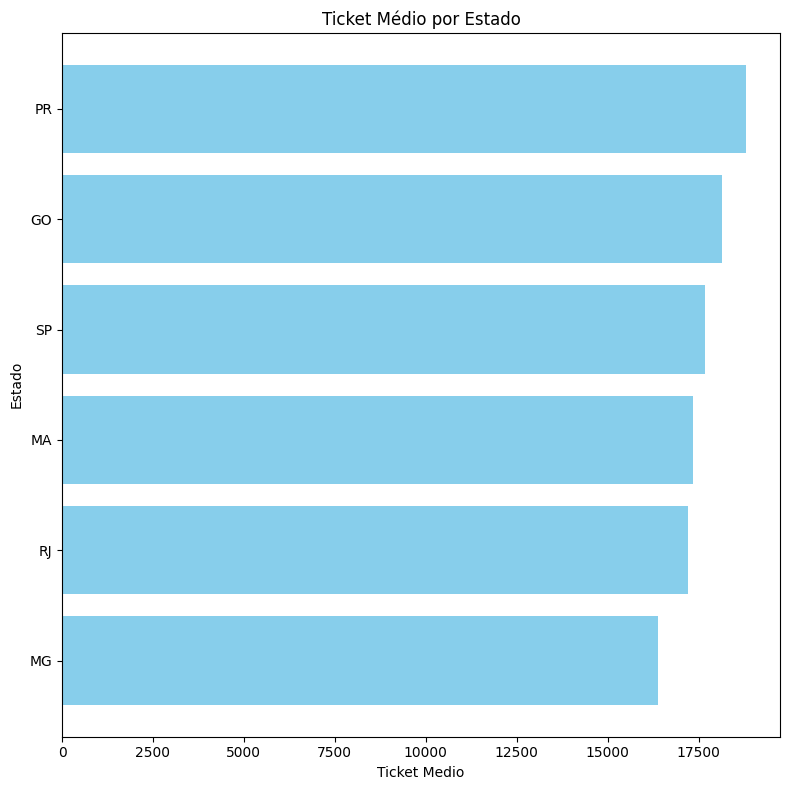

In [23]:
import matplotlib.pyplot as plt

df_ordenado_ticket_medio_cidades = resposta_2_1.sort_values(by='ticket_medio', ascending=True)

plt.figure(figsize=(8, 8))
plt.barh(df_ordenado_ticket_medio_cidades['estado'], df_ordenado_ticket_medio_cidades['ticket_medio'], color='skyblue')
plt.xlabel('Ticket Medio')
plt.ylabel('Estado')
plt.title('Ticket Médio por Estado')
plt.tight_layout()
plt.show()

### Taxa pedidos por estado

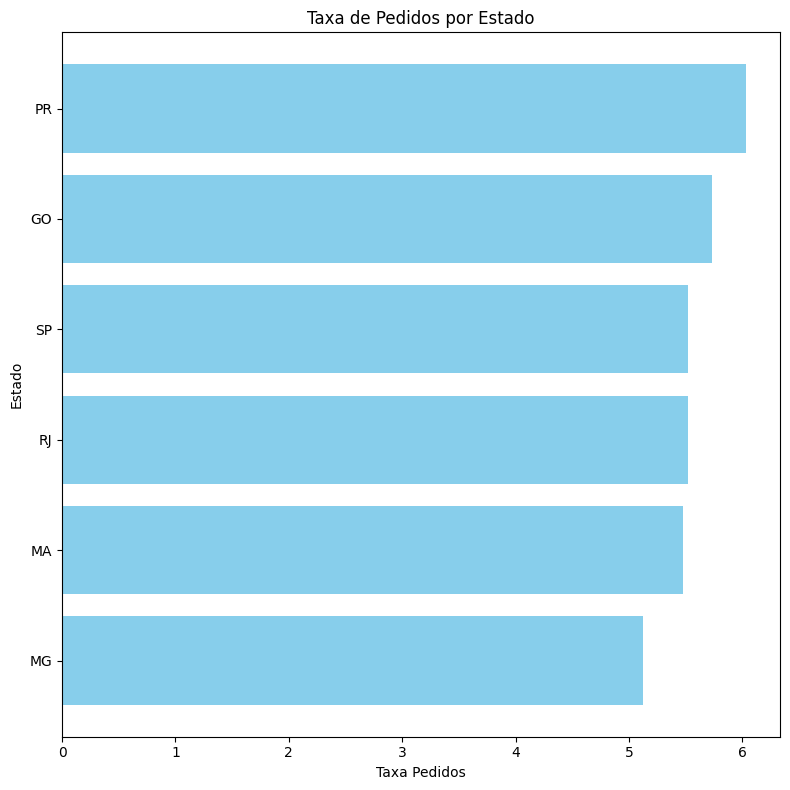

In [24]:
import matplotlib.pyplot as plt

df_ordenado_taxa_pedidos_estado = resposta_2_1.sort_values(by='taxa_pedidos', ascending=True)

plt.figure(figsize=(8, 8))
plt.barh(df_ordenado_taxa_pedidos_estado['estado'], df_ordenado_taxa_pedidos_estado['taxa_pedidos'], color='skyblue')
plt.xlabel('Taxa Pedidos')
plt.ylabel('Estado')
plt.title('Taxa de Pedidos por Estado')
plt.tight_layout()
plt.show()

## 3. Quais são os estados e cidades com maior valor em vendas? Liste-os em ordem decrescente.

**A resposta para essa questão é impossível com a base de dados que temos, uma vez que no cadastro dos clientes, as cidades e os estados não estão relacionados corretamente. Abaixo, realizei as queries que mostram valores de pedido para os 26 estados e o Distrito Federal do Brasil sendo que, quando realizamos a consulta para as cidades, temos somente 6. Isso prova que temos incoerência no cadastro dos dados, fazendo possível a resposta após a confirmação com uma nova extração de dados corretos.**

### Valor pedidos por estado

In [34]:
query_resposta_3 = """
SELECT
    c.estado,
    SUM(p.valor_total) AS valor_pedidos
FROM
df_clientes c
INNER JOIN df_pedidos p ON c.cliente_id = p.cliente_id
WHERE
p.status = "Confirmado"
GROUP BY c.estado
ORDER BY valor_pedidos DESC
"""
resposta_3 = sqldf(query_resposta_3, globals())
print(resposta_3)

   estado  valor_pedidos
0      MG        1042707
1      RR         996613
2      GO         907330
3      MA         905260
4      AP         868457
5      ES         863116
6      PA         859011
7      TO         850980
8      SE         830984
9      RJ         830709
10     AL         828874
11     MT         805316
12     AM         797341
13     SC         790818
14     DF         755397
15     MS         743910
16     PR         723539
17     AC         716164
18     BA         711964
19     SP         707338
20     PI         688043
21     RN         665148
22     PE         664056
23     RO         655886
24     PB         651013
25     CE         633867
26     RS         600818


### Valor pedidos por cidade

In [32]:
query_resposta_3_1 = """
SELECT
    c.cidade,
    SUM(p.valor_total) AS valor_pedidos
FROM
df_clientes c
INNER JOIN df_pedidos p ON c.cliente_id = p.cliente_id
WHERE
p.status = "Confirmado"
GROUP BY c.cidade
ORDER BY valor_pedidos DESC
"""
resposta_3_1 = sqldf(query_resposta_3_1, globals())
print(resposta_3_1)

           cidade  valor_pedidos
0       São Paulo        9193242
1  Rio de Janeiro        2941236
2        Maranhão        2912830
3         Goiânia        2903485
4        Curitiba        1635440
5  Belo Horizonte        1508426


## 4. A categoria do produto ou quantidade de itens do pedido influencia no status no pedido?

In [91]:
query_resposta_4 = """
SELECT
    DISTINCT(pr.categoria),
    COUNT(DISTINCT CASE WHEN p.status = 'Confirmado' THEN p.pedido_id END) as pedidos_confirmados,
    COUNT(DISTINCT CASE WHEN p.status = 'Pending' THEN p.pedido_id END) as pedidos_pendente,
    COUNT(DISTINCT CASE WHEN p.status = 'CANCELADO' THEN p.pedido_id END) AS pedidos_cancelados,
    COUNT(DISTINCT(i.pedido_id)) as total_pedidos,
    ROUND(100.0 * COUNT(DISTINCT CASE WHEN p.status = 'Confirmado' THEN p.pedido_id END)/COUNT(DISTINCT p.pedido_id),2) as taxa_confirmacao
FROM
df_itenspedido i
INNER JOIN df_pedidos p 
ON i.pedido_id = p.pedido_id
INNER JOIN df_produtos pr
ON i.produto_id = pr.produto_id
group by pr.categoria
order by taxa_confirmacao desc
"""

resposta_4 = sqldf(query_resposta_4, globals())
print(resposta_4)

     categoria  pedidos_confirmados  pedidos_pendente  pedidos_cancelados  \
0   Brinquedos                 1390               337                 312   
1    Alimentos                  993               228                 238   
2  Eletrônicos                 2785               690                 682   
3       Livros                 2521               620                 629   
4    Decoração                 1129               294                 269   
5     Esportes                 1609               419                 391   
6  Eletronicos                 1155               298                 295   
7       Roupas                 4195              1086                1091   
8    Decoraçao                 1282               329                 343   

   total_pedidos  taxa_confirmacao  
0           2039             68.17  
1           1459             68.06  
2           4157             67.00  
3           3770             66.87  
4           1692             66.73  
5      

In [96]:
query_resposta_4_1 = """
SELECT
    distinct(i.pedido_id),
    SUM(i.quantidade) as qtde,
    p.status
FROM
df_itenspedido i
INNER JOIN df_pedidos p 
ON i.pedido_id = p.pedido_id
INNER JOIN df_produtos pr
ON i.produto_id = pr.produto_id
group by i.pedido_id
order by qtde DESC
"""

resposta_4_1 = sqldf(query_resposta_4_1, globals())
print(resposta_4_1)

      pedido_id  qtde      status
0        464863    17   CANCELADO
1        970329    16  Confirmado
2        914996    16  Confirmado
3        912612    16     Pending
4        731531    16   CANCELADO
...         ...   ...         ...
9995     113183     1  Confirmado
9996     113100     1  Confirmado
9997     108298     1  Confirmado
9998     106281     1     Pending
9999     100295     1  Confirmado

[10000 rows x 3 columns]
